In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import matplotlib.pyplot as plt
import warnings

In [2]:
pd.set_option('display.max_columns',None)
warnings.filterwarnings("ignore")

In [3]:
X = pd.read_csv('../dados_processados/cursos-pos-processamento.csv',sep=';')

In [4]:
X.shape

(6511, 40)

In [5]:
X.columns

Index(['no_cine_area_geral_agricultura,_silvicultura,_pesca_e_veterinaria',
       'no_cine_area_geral_artes_e_humanidades',
       'no_cine_area_geral_ciencias_naturais,_matematica_e_estatistica',
       'no_cine_area_geral_ciencias_sociais,_comunicacao_e_informacao',
       'no_cine_area_geral_computacao_e_tecnologias_da_informacao_e_comunicacao_(tic)',
       'no_cine_area_geral_educacao',
       'no_cine_area_geral_engenharia,_producao_e_construcao',
       'no_cine_area_geral_negocios,_administracao_e_direito',
       'no_cine_area_geral_saude_e_bem-estar', 'no_cine_area_geral_servicos',
       'tp_grau_academico_bacharelado', 'tp_grau_academico_licenciatura',
       'tp_grau_academico_tecnologico', 'enade_faixa_1.5', 'enade_faixa_2.0',
       'enade_faixa_3.0', 'enade_faixa_4.0', 'enade_faixa_5.0',
       'cpc_faixa_1.5', 'cpc_faixa_2.0', 'cpc_faixa_3.0', 'cpc_faixa_4.0',
       'cpc_faixa_5.0', 'qt_vg_total', 'qt_vg_remanesc', 'qt_inscrito_total',
       'qt_insc_vg_remanesc', '

In [6]:
X_to_train = X.drop(['no_curso','co_curso'],axis=1)

In [7]:
min_clusters = 2
max_clusters = 20
results = []

for n_clusters in range(min_clusters, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=100)
    kmeans.fit(X_to_train)
    labels = kmeans.labels_

    # Calcular métricas
    silhouette = silhouette_score(X_to_train, labels)
    calinski = calinski_harabasz_score(X_to_train, labels)
    davies = davies_bouldin_score(X_to_train, labels)

    results.append((n_clusters, silhouette, calinski, davies))

# Crie um DataFrame com os resultados
columns = ["Cluster", "Silhouette", "Calinski-Harabasz", "Davies-Bouldin"]
df = pd.DataFrame(results, columns=columns)

In [8]:
df

,Cluster,Silhouette,Calinski-Harabasz,Davies-Bouldin
0,2,0.220645,1496.340593,2.004295
1,3,0.143911,1039.839877,2.443259
2,4,0.128424,858.516883,2.419952
3,5,0.134701,760.191961,2.301037
4,6,0.106552,670.727338,2.316181
5,7,0.106240,614.347299,2.426452
6,8,0.110015,567.700683,2.329280
7,9,0.095785,529.806369,2.335439
8,10,0.098001,495.309609,2.370580
9,11,0.098548,466.368358,2.309258


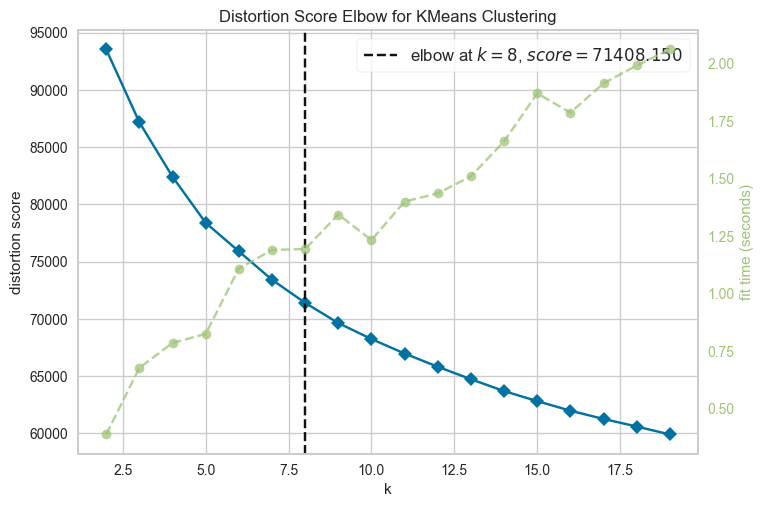

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
visualizer = KElbowVisualizer(KMeans(random_state=42, n_init=100), k=(2, 20))
visualizer.fit(X_to_train)
visualizer.show()

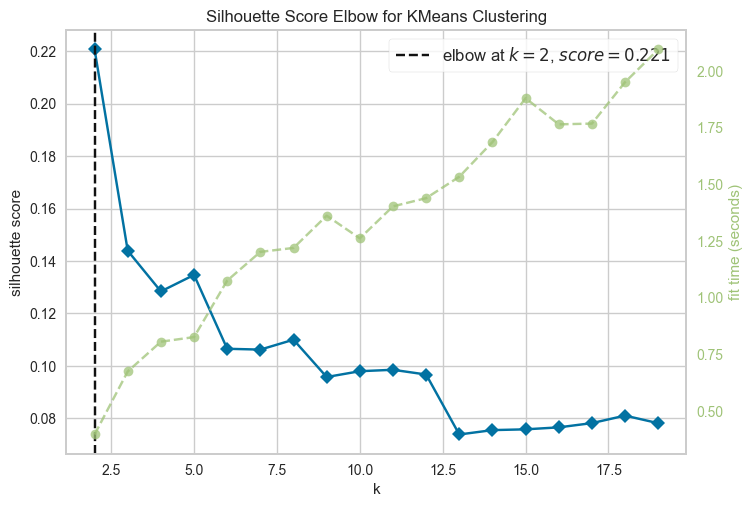

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [10]:
visualizer = KElbowVisualizer(KMeans(random_state=42, n_init=100), k=(2, 20),metric='silhouette')
visualizer.fit(X_to_train)
visualizer.show()

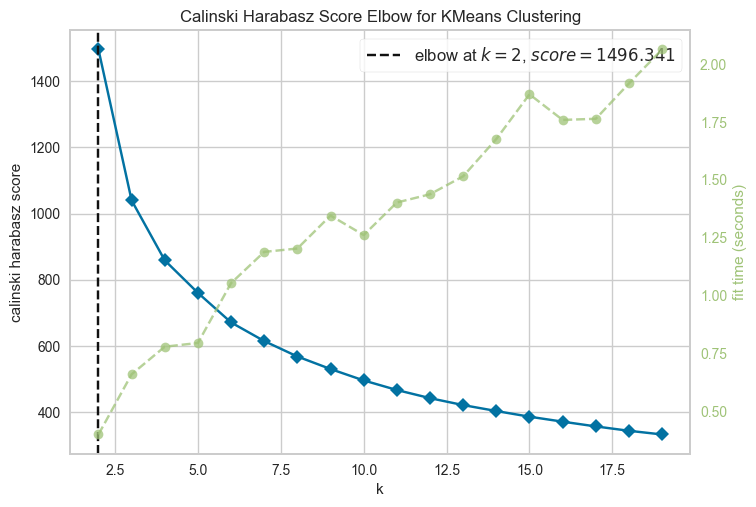

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [11]:
visualizer = KElbowVisualizer(KMeans(random_state=42, n_init=100), k=(2, 20),metric='calinski_harabasz')
visualizer.fit(X_to_train)
visualizer.show()